# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a classification algorithm that assigns a class label to a data point based on the class labels of its k nearest neighbors in the training set. It is a non-parametric algorithm, which means that it does not make any assumptions about the distribution of the data.

The KNN algorithm works as follows:

- Choose a value of k (the number of nearest neighbors to consider).
- For each data point in the test set, compute its distance to all data points in the training set.
- Select the k nearest neighbors based on their distances.
- Assign the class label that appears most frequently among the k nearest neighbors to the test point.

The distance between two data points can be computed using a distance metric such as Euclidean distance, Manhattan distance, or Minkowski distance. The choice of distance metric depends on the nature of the data and the problem at hand.

One important aspect of the KNN algorithm is the choice of the value of k. A small value of k will result in a more flexible decision boundary that can capture complex patterns in the data, but may also lead to overfitting. A large value of k will result in a smoother decision boundary that may not capture fine details in the data, but is less prone to overfitting. The value of k is typically chosen using cross-validation.

KNN can also be used for regression tasks, where the goal is to predict a continuous value instead of a class label. In this case, the predicted value for a test point is the average of the values of its k nearest neighbors in the training set.

## Code 
Here is an implementation of the KNN classifier in Python:

In [3]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute distances between the test point and all training points
            if self.distance == 'euclidean':
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance == 'manhattan':
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            else:
                distances = np.power(np.sum(np.power(np.abs(self.X_train - x), self.distance), axis=1), 1/self.distance)
                
            # Select the k nearest neighbors
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            
            # Assign the class label that appears most frequently among the k nearest neighbors
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)
        
        return np.array(y_pred)


The KNN class has two main methods: fit and predict. The fit method takes the training data as input and stores it in instance variables. The predict method takes the test data as input and computes the class labels for each test point using the KNN algorithm.

The predict method computes the distances between the test point and all training points, selects the k nearest neighbors based on the distances, and assigns the class label that appears most frequently among the k nearest neighbors to the test point.

The distance parameter allows the user to choose the distance metric to use for computing distances. The default value is euclidean, but the user can also choose manhattan or any other value p for the Minkowski distance.

### Test 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### Visualization 

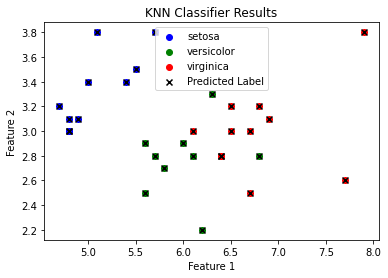

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5 and euclidean distance
knn = KNN(k=5, distance='euclidean')

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Create scatter plots of the test data with colored points representing the true and predicted labels
fig, ax = plt.subplots()
scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('KNN Classifier Results')
handles = [scatter1, scatter2, scatter3, scatter4]
labels = [h.get_label() for h in handles]
ax.legend(handles=handles, labels=labels)
plt.show()
